I need the samples for clustering redshifts: 

- shape catalogue from alex justin
- shape catalogue randoms (after applying rm mask)
- redmagic from mastercat
- redmagic randoms from mastercat

to shapes and rm randoms, the rm mask has to be applied. 
Also, to the shape catalogue, I need to select a select_flag == 0. 



In [1]:
folder = '/global/cscratch1/sd/giannini/clusteringz/Y3data/'

In [2]:
import numpy as np
import cPickle as pickle
import os
import shutil
import pandas as pd
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        f.close()
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        mute =  pickle.load(f)
        f.close()
    return mute

In [3]:
import astropy.io.fits as pf

In [2]:
meow = pf.open('/project/projectdirs/des/jvicente/y3/sof/train_gold_2_2/y3_train_april2018_nvp_y4.fits')

In [3]:
meow[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   80 / width of table in bytes                        
NAXIS2  =               143562 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   10 / number of fields in each row                   
TTYPE1  = 'COADD_OBJECT_ID'    / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'CM_FLUX_CORRECTED_G' / label for field   2                           
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'CM_FLUX_CORRECTED

# import file

In [4]:
import matplotlib.pyplot as plt

import astropy.io.fits as pf
import h5py as h5py
import time


### sompz

In [112]:
import h5py as h5py 

sompz_data = h5py.File('/global/cscratch1/sd/aamon/sompz_data/v0.12/sompz_data.h5')

[u'catalog']

In [113]:
sompz_data.close()

In [31]:
sompz_data['catalog/sompz']['unsheared'].keys()

[u'PASS_WL',
 u'bhat',
 u'cell_wide',
 u'e1',
 u'e2',
 u'flux_i',
 u'flux_r',
 u'flux_z']

In [34]:
np.array(sompz_data['catalog/sompz']['unsheared/bhat'])

array([ 1,  1,  0, ...,  3,  0, -1])

### mastercat per rm

In [52]:
mastercat = h5py.File('/project/projectdirs/des/www/y3_cats/Y3_mastercat_7_24_19.h5')

In [91]:
mastercat.close()

In [53]:
mastercat.keys()

[u'catalog', u'index', u'maps', u'masks', u'randoms', u'regions']

In [54]:
mastercat['catalog']['redmagic']['combined_sample_fid'].keys()

[u'chisq',
 u'coadd_object_id',
 u'dec',
 u'mabs',
 u'mabs_err',
 u'model_mag',
 u'model_magerr',
 u'ra',
 u'redmagicflag',
 u'weight',
 u'zlum',
 u'zmag',
 u'zmag_err',
 u'zredmagic',
 u'zredmagic_e',
 u'zspec']

# redMagic mask 

In [85]:
hpix = np.array(mastercat['masks']['redmagic']['combined_sample_fid']['hpix'])

In [86]:
nside = 4096

201326592


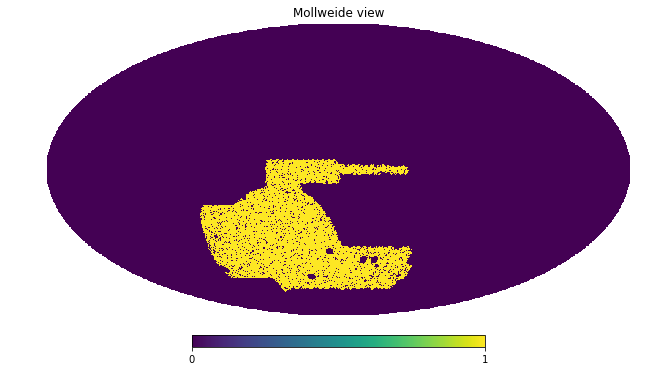

In [57]:
import healpy as hp

#num pixels for given nside
mask = np.zeros(hp.pixelfunc.nside2npix(nside))
print len(mask)
#assign true to the part that is 
mask[hpix] = True
hp.mollview(mask,nest=True)

# Red Magic

In [62]:
decrm = mastercat['catalog'][ 'redmagic']['combined_sample_fid']['dec']
rarm = mastercat['catalog'][ 'redmagic']['combined_sample_fid']['ra']
zspecrm = mastercat['catalog'][ 'redmagic']['combined_sample_fid']['zspec']
zredmagic = mastercat['catalog'][ 'redmagic']['combined_sample_fid']['zredmagic']
weight = mastercat['catalog'][ 'redmagic']['combined_sample_fid']['weight']
id_obj = mastercat['catalog'][ 'redmagic']['combined_sample_fid']['coadd_object_id']
rm_flag = mastercat['catalog'][ 'redmagic']['combined_sample_fid']['redmagicflag']

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
         11775.,  15378.,  18225.,  28313.,  33237.,  35097.,  40001.,
         51672.,  58250.,  55356.,  59034.,  66627.,  76729.,  79222.,
         82868.,  95413., 106524., 111452., 111568., 115656., 121909.,
        127176., 131885., 134753., 123795.,  63089.,  58706.,  72885.,
         74474.,  66059.,  74694.,  68188.,  82901.,  84968.,  79906.,
         75437.,  77696.,  92653., 105036.,  57931.,      0.,      0.]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.734

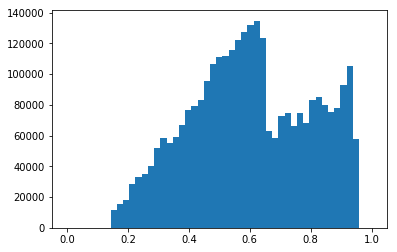

In [60]:
plt.hist(zredmagic, bins = np.linspace(0, 1, 50))

In [67]:
from astropy.table import Table
path = folder + 'data/redMagic_Y3data.fits'
fits_f = Table()
fits_f['RA'] = rarm
fits_f['DEC'] = decrm
fits_f['ZREDMAGIC'] = zredmagic
fits_f['Z'] = zspecrm
fits_f['weight'] = weight
fits_f.write(path)

In [11]:
rm = pf.open(folder + 'data/redMagic_Y3data.fits')
eboss = pf.open(folder+'data/eBOSS_BOSS_all5_v7nov19_y3cuts_totweight.fits')

In [19]:
max(eboss[1].data['Z'])

2.1999822

In [27]:
mask_rm = (rm[1].data['ZREDMAGIC']>0.15) & (rm[1].data['ZREDMAGIC']<0.95)

In [30]:
mask_eboss = (eboss[1].data['Z']>0.1) & (eboss[1].data['Z']<1.1)

In [31]:
len(eboss[1].data['Z'][mask_eboss]), len(rm[1].data['ZREDMAGIC'][mask_rm])

(239139, 3026538)

Text(0.5,0,'z')

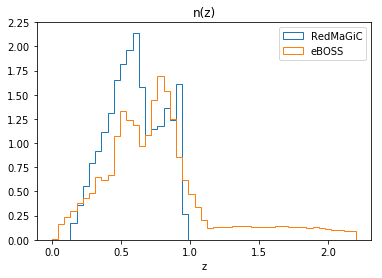

In [22]:
plt.hist(rm[1].data['ZREDMAGIC'], bins = np.linspace(0, 2.2, 50), normed=True, histtype = 'step', label = 'RedMaGiC')
plt.hist(eboss[1].data['Z'], bins = np.linspace(0, 2.2, 50), normed=True, histtype = 'step', label = 'eBOSS')
plt.title('n(z)')
plt.legend()
plt.xlabel('z')

In [63]:
rm[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =              2672681 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'RA      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'DEC     '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'ZREDMAGIC'       

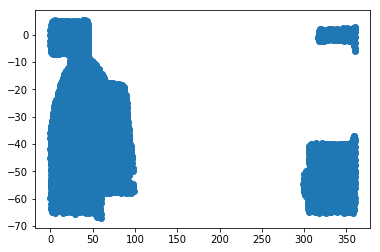

In [68]:
plt.scatter(rarm[1::300], decrm[1::300])

I have to convert ra-dec of every galaxy in pixel coordinates. 
then check, if the galaxy is in the group of pixels allowed by the mask, set is as true

In [18]:
#shape_pix = convert_to_pix_coord(ra, dec, nside = 4096)

In [53]:
#mask_rm = np.in1d(shape_pix, hpix)

# rm andoms

In [68]:
mastercat['randoms']['redmagic']['combined_sample_fid'].keys()

[u'dec', u'ra', u'weight', u'z']

In [69]:
ra_rm_rand = mastercat['randoms']['redmagic']['combined_sample_fid']['ra']
dec_rm_rand = mastercat['randoms']['redmagic']['combined_sample_fid']['dec']

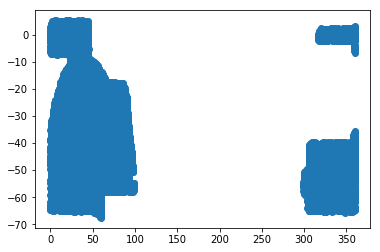

In [93]:
plt.scatter(ra_rm_rand[1::1000], dec_rm_rand[1::1000])

In [70]:
from astropy.table import Table
path = folder + 'data/redMagic_Y3data_randoms.fits'
fits_f = Table()
fits_f['RA'] = ra_rm_rand
fits_f['DEC'] = dec_rm_rand
fits_f.write(path)

In [64]:
rmrandom = pf.open(folder + 'data/redMagic_Y3_randoms.fits')

In [65]:
rmrandom[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =             65656100 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'RA      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'DEC     '                                                            
TFORM2  = 'D       '                                                            

# Shape catalog

In [8]:
import astropy.io.fits as pf

In [31]:
sompz_data['catalog/sompz']['unsheared'].keys()

[u'PASS_WL',
 u'bhat',
 u'cell_wide',
 u'e1',
 u'e2',
 u'flux_i',
 u'flux_r',
 u'flux_z']

In [73]:
sompz_data['catalog/sompz'].keys()

[u'dec',
 u'id',
 u'pzdata',
 u'ra',
 u'sheared_1m',
 u'sheared_1p',
 u'sheared_2m',
 u'sheared_2p',
 u'unsheared']

In [34]:
np.array(sompz_data['catalog/sompz']['unsheared/bhat'])

array([ 1,  1,  0, ...,  3,  0, -1])

In [95]:
e1_sh = np.array(sompz_data['catalog/sompz']['unsheared']['e1'])
e2_sh = np.array(sompz_data['catalog/sompz']['unsheared']['e2'])
id_obj_sh =  np.array(sompz_data['catalog/sompz']['id'])
ra_sh = np.array(sompz_data['catalog/sompz']['ra'] )                                                                                    
dec_sh = np.array(sompz_data['catalog/sompz']['dec'])                                                                                 
flux_i_sh = np.array(sompz_data['catalog/sompz']['unsheared']['flux_i'])
tomo_bin = np.array(sompz_data['catalog/sompz']['unsheared/bhat'])
# z_sh = wide[1].data['Z']
# hpix_sh = wide[1].data['HPIX_16384']

In [96]:
e1_sh = e1_sh.byteswap().newbyteorder()
e2_sh = e2_sh.byteswap().newbyteorder()
id_obj_sh = id_obj_sh.byteswap().newbyteorder()
ra_sh = ra_sh.byteswap().newbyteorder()
dec_sh = dec_sh.byteswap().newbyteorder()
flux_i_sh = flux_i_sh.byteswap().newbyteorder()
tomo_bin = tomo_bin.byteswap().newbyteorder()
# z_sh = z_sh.byteswap().newbyteorder()
# hpix_sh = hpix_sh.byteswap().newbyteorder()

In [97]:
import pandas as pf

e1_sh = pd.DataFrame(e1_sh)
e2_sh = pd.DataFrame(e2_sh)
id_obj_sh =  pd.DataFrame(id_obj_sh)                                                                          
ra_sh = pd.DataFrame(ra_sh)
dec_sh = pd.DataFrame(dec_sh)
flux_i_sh = pd.DataFrame(flux_i_sh)
tomo_bin = pd.DataFrame(tomo_bin)
# z_sh = pd.DataFrame(z_sh)
# hpix_sh = pd.DataFrame(hpix_sh)

In [88]:
ind = np.random.randint(0,len(ra_sh),1000)

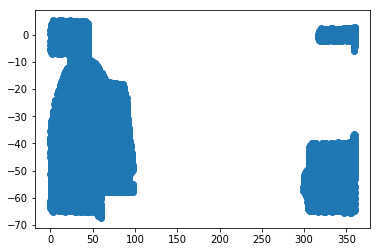

In [92]:
plt.scatter(ra_sh[1::3000], dec_sh[1::3000])

apply mask_flags mask and create new mask in pixel coordinates

In [10]:
# ra_sh = wide[1].data['RA']#[#mask_wl]                                                                                                     
# dec_sh = wide[1].data['DEC']#[#mask_wl]                                                                                                     


In [84]:
pix_sample = convert_to_pix_coord(ra_sh, dec_sh,nside,nest=True)
#mask_redmagic = load...
#mask_rm = np.in1d(shape_pix, hpix)
mask_rm = np.in1d(pix_sample,hpix)
#new_ra = ra[new_mask]

ValueError: THETA is out of range [0,pi]

In [78]:
# from astropy.table import Table
# # folder = "/global/cscratch1/sd/giannini/clusteringz/wz/data/"
# path = folder + 'data/shape_Y3.fits'
# fits_f = Table()
# fits_f['ra'] = ra_sh[mask_rm]
# fits_f['dec'] = dec_sh[mask_rm]
# fits_f['e1'] = e1_sh[mask_rm]
# fits_f['e2'] = e2_sh[mask_rm]
# fits_f['z'] = z_sh[mask_rm]
# fits_f['tomo_bin'] = tomo_bin[mask_rm]
# fits_f['id_obj'] = id_obj_sh[mask_rm]
# fits_f['flux_i'] = flux_i_sh[mask_rm]
# fits_f.write(path)

In [111]:
from astropy.table import Table
# folder = "/global/cscratch1/sd/giannini/clusteringz/wz/data/"
path = folder + 'data/shape_Y3data.fits'
fits_f = Table()
fits_f['ra'] = ra_sh
fits_f['dec'] = dec_sh
fits_f['e1'] = e1_sh
fits_f['e2'] = e2_sh
fits_f['tomo_bin'] = tomo_bin
fits_f['id_obj'] = id_obj_sh
fits_f['flux_i'] = flux_i_sh
fits_f.write(path)

In [100]:
from astropy.table import Table
# folder = "/global/cscratch1/sd/giannini/clusteringz/wz/data/"
tbins = 4
for t in range(tbins):
    mask_tbin = tomo_bin == t
    path = folder + 'data/shape_Y3data_tbin{0}.fits'.format(t)
    fits_f = Table()
    fits_f['ra'] = ra_sh[mask_tbin]
    fits_f['dec'] = dec_sh[mask_tbin]
    fits_f['e1'] = e1_sh[mask_tbin]
    fits_f['e2'] = e2_sh[mask_tbin]
    fits_f['tomo_bin'] = tomo_bin[mask_tbin]
    fits_f['id_obj'] = id_obj_sh[mask_tbin]
    fits_f['flux_i'] = flux_i_sh[mask_tbin]
    fits_f.write(path)

In [101]:
import astropy.io.fits as pf

meow = pf.open(folder + 'data/shape_Y3data_tbin1.fits')
ra_meow = meow[1].data['ra']
dec_meow = meow[1].data['dec']

In [74]:
mute = pf.open("/global/cscratch1/sd/giannini/clusteringz/wz_Y3buzzard_w/data/shape_Y3_randoms_small.fits")

In [75]:
mute[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =            127058308 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '                                                            

In [109]:
ind = np.random.randint(0,len(meow[1].data['ra']),5000)

In [110]:
plt.scatter(ra_meow[ind],(dec_meow[ind]))

KeyboardInterrupt: 

In [37]:
meow[1].data['tomo_bin']

array([1, 1, 1, ..., 0, 0, 3])

### SHAPE RANDOMS

In [3]:
# nside = 1024
# Ngen = 5*len(ra_sh[mask_rm])

# ra_field = ra_sh[mask_rm]
# dec_field =  dec_sh[mask_rm]

# minra = min(ra_field)
# maxra = max(ra_field)
# mindec = min(dec_field)
# maxdec = max(dec_field)
# pix = convert_to_pix_coord(ra_field ,dec_field,nside)
# upix = np.unique(pix)
# #mask = np.zeros(hp.nside2npix(nside))

# # create randoms:

# ra_random,dec_random = generate_randoms_radec(minra, maxra, mindec, maxdec, Ngen, raoffset=0)
# pix_random =  convert_to_pix_coord(ra_random,dec_random,nside)
# new_mask = np.in1d(pix_random,upix)
# ra_random = ra_random[new_mask]
# dec_random = dec_random[new_mask]


In [1]:
# from astropy.table import Table
# path = folder + 'data/shape_Y3_randoms.fits'
# #path = '../data/shape_y1_rMmask_randoms.fits'
# fits_f = Table()
# fits_f['ra'] = ra_random #_rndm
# fits_f['dec'] = dec_random #_rndm
# fits_f.write(path)

In [30]:
nside = 1024
Ngen = len(ra_sh[mask_rm])

ra_field = ra_sh[mask_rm]
dec_field =  dec_sh[mask_rm]

minra = min(ra_field)
maxra = max(ra_field)
mindec = min(dec_field)
maxdec = max(dec_field)
pix = convert_to_pix_coord(ra_field ,dec_field,nside)
upix = np.unique(pix)
#mask = np.zeros(hp.nside2npix(nside))

# create randoms:

ra_random,dec_random = generate_randoms_radec(minra, maxra, mindec, maxdec, Ngen, raoffset=0)
pix_random =  convert_to_pix_coord(ra_random,dec_random,nside)
new_mask = np.in1d(pix_random,upix)
ra_random = ra_random[new_mask]
dec_random = dec_random[new_mask]


In [31]:
from astropy.table import Table
path = folder + 'data/shape_Y3_randoms_small.fits'
#path = '../data/shape_y1_rMmask_randoms.fits'
fits_f = Table()
fits_f['ra'] = ra_random #_rndm
fits_f['dec'] = dec_random #_rndm
fits_f.write(path)

In [32]:
import astropy.io.fits as pf

meowww = pf.open(folder + 'data/shape_Y3_randoms.fits')
meowww[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =            145136036 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '                                                            

In [69]:
65656100*2

131312200

In [33]:
ind = np.random.randint(0,len(meowww[1].data['ra']),1000)

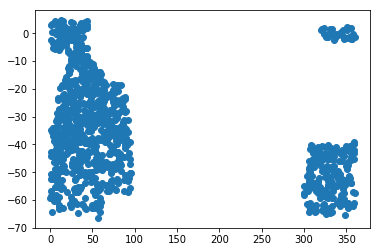

In [34]:
plt.scatter((meowww[1].data['ra'])[ind],(meowww[1].data['dec'][ind]))

In [41]:
import pyfits as pf
mute = pf.open("/global/cscratch1/sd/giannini/clusteringz/wz_Y3buzzard_truez/data/shape_Y3.fits")
len

21448175

# eBOSS

In [4]:
import astropy.io.fits as pf
eboss = pf.open("/global/cscratch1/sd/giannini/clusteringz/Y3data/data/eBOSS_BOSS_all5_v7nov19_y3cuts_totweight.fits")


In [6]:
eboss[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   36 / length of dimension 1                          
NAXIS2  =               280869 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    9 / number of table fields                         
TTYPE1  = 'RA      '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'DEC     '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'Z       '        

In [5]:
import numpy as np
ind = np.random.randint(0,len(eboss[1].data['RA']),1000)

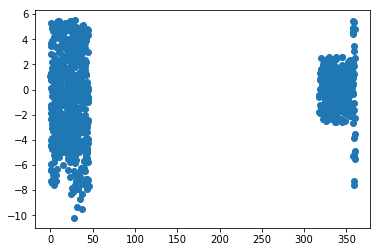

In [6]:
import matplotlib.pyplot as plt
plt.scatter((eboss[1].data['RA'])[ind],(eboss[1].data['DEC'])[ind])

In [7]:
eboss_rdm = pf.open("/global/cscratch1/sd/giannini/clusteringz/Y3data/data/eBOSS_BOSS_all5_v7nov19_y3cuts_totweight_randoms.fits")


In [9]:
eboss_rdm[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   36 / length of dimension 1                          
NAXIS2  =             11874466 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    9 / number of table fields                         
TTYPE1  = 'RA      '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'DEC     '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'Z       '        

In [8]:
ra_eboss = eboss[1].data['RA']
dec_eboss = eboss[1].data['DEC']


In [9]:
folder = "/global/cscratch1/sd/giannini/clusteringz/Y3data/"
path = folder + 'data/shape_Y3data.fits'

shape = pf.open(path)

In [19]:
shape[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =            112949666 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'e1      '        

In [1]:
import astropy.io.fits as pf
miau = pf.open('/global/cscratch1/sd/giannini/clusteringz/Y3data/data/eBOSS_BOSS_all5_v7nov19_y3cuts_totweight.fits')

In [2]:
miau[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   36 / length of dimension 1                          
NAXIS2  =               280869 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    9 / number of table fields                         
TTYPE1  = 'RA      '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'DEC     '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'Z       '        

(array([13260., 34263., 71817., 86281., 36359.,  7877.,  8558.,  8395.,
         7891.,  6168.]),
 array([-1.3758999e-04,  2.1987438e-01,  4.3988636e-01,  6.5989834e-01,
         8.7991029e-01,  1.0999223e+00,  1.3199342e+00,  1.5399462e+00,
         1.7599583e+00,  1.9799702e+00,  2.1999822e+00], dtype=float32),
 <a list of 10 Patch objects>)

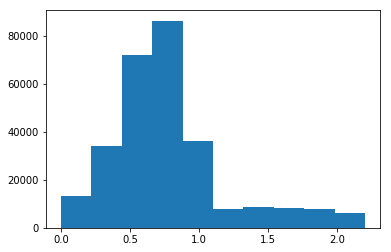

In [5]:
import matplotlib.pyplot as plt
plt.hist(miau[1].data['Z'])

In [10]:
%matplotlib inline
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

def convert_to_pix_coord(ra, dec, nside=1024,nest=False):
    """
    Converts RA,DEC to hpix coordinates
    """

    theta = (90.0 - dec) * np.pi / 180.
    #print theta
    phi = ra * np.pi / 180.
    pix = hp.ang2pix(nside, theta, phi, nest=nest)

    return pix

def IndexToDeclRa(index, nside=1024,nest= False):
    theta,phi=hp.pixelfunc.pix2ang(nside ,index,nest=nest)
    return -np.degrees(theta-np.pi/2.),np.degrees(phi)

def generate_randoms_radec(minra, maxra, mindec, maxdec, Ngen, raoffset=0):
    r = 1.0
    # this z is not redshift!
    zmin = r * np.sin(np.pi * mindec / 180.)
    zmax = r * np.sin(np.pi * maxdec / 180.)
   
    # parity transform from usual, but let's not worry about that
    phimin = np.pi / 180. * (minra - 180 + raoffset)
    phimax = np.pi / 180. * (maxra - 180 + raoffset)
   
    # generate ra and dec
    z_coord = np.random.uniform(zmin, zmax, Ngen)  # not redshift!
    phi = np.random.uniform(phimin, phimax, Ngen)
    dec_rad = np.arcsin(z_coord / r)
   
    # convert to ra and dec
    ra = phi * 180 / np.pi + 180 - raoffset
    dec = dec_rad * 180 / np.pi
    return ra, dec




In [34]:
print len(ra_shape[np.isnan(ra_shape)])
print len(dec_shape[np.isnan(dec_shape)])

3020759
3020759


In [41]:
len(ra_shape)

112949666

In [11]:
import pandas as pd

In [12]:
ra_sh = shape[1].data['ra']
dec_sh = shape[1].data['dec']
e1_sh = shape[1].data['e1']
e2_sh = shape[1].data['e2']
tomo_bin_sh = shape[1].data['tomo_bin']
id_obj_sh = shape[1].data['id_obj']
flux_i_sh = shape[1].data['flux_i']

In [13]:
ra_shape_sw = ra_sh.byteswap().newbyteorder()
dec_shape_sw = dec_sh.byteswap().newbyteorder()
e1_shape_sw = e1_sh.byteswap().newbyteorder()
e2_shape_sw = e2_sh.byteswap().newbyteorder()
tomo_bin_shape_sw = tomo_bin_sh.byteswap().newbyteorder()
id_obj_shape_sw = id_obj_sh.byteswap().newbyteorder()
flux_i_shape_sw = flux_i_sh.byteswap().newbyteorder()

NameError: name 'flux_' is not defined

In [17]:
ra_shape_pd = pd.DataFrame(ra_shape_sw)
dec_shape_pd = pd.DataFrame(dec_shape_sw)
e1_shape_pd = pd.DataFrame(e1_shape_sw)
e2_shape_pd = pd.DataFrame(e2_shape_sw)
tomo_bin_shape_pd = pd.DataFrame(tomo_bin_shape_sw)
id_obj_shape_pd = pd.DataFrame(id_obj_shape_sw)
flux_i_shape_pd = pd.DataFrame(flux_i_shape_sw)

In [20]:
ra_shape_nonan = ra_shape_pd.dropna()
dec_shape_nonan = dec_shape_pd.dropna()
e1_shape_nonan = e1_shape_pd.dropna()
e2_shape_nonan = e2_shape_pd.dropna()

flux_i_shape_nonan = flux_i_shape_pd.dropna()

In [28]:
tomo_bin_shape_nonan = tomo_bin_shape_pd.dropna()
id_obj_shape_nonan = id_obj_shape_pd.dropna()

In [21]:
nside = 1024
Ngen = len(ra_eboss)

ra_field = ra_eboss
dec_field =  dec_eboss

minra = min(ra_field)
maxra = max(ra_field)
mindec = min(dec_field)
maxdec = max(dec_field)
pix = convert_to_pix_coord(ra_field, dec_field, nside, nest=True)
upix = np.unique(pix)
#mask = np.zeros(hp.nside2npix(nside))


pix_shape = convert_to_pix_coord(ra_shape_nonan, dec_shape_nonan, nside, nest = True)
#upix_shape = np.unique(pix_shape)

new_mask = np.in1d(pix_shape, upix)


In [35]:
nan_mask  = np.in1d(ra_sh, ra_shape_nonan)


In [39]:
ra_shape_eboss = ra_shape_nonan[new_mask]
dec_shape_eboss = dec_shape_nonan[new_mask]
e1_shape_eboss = e1_shape_nonan[new_mask]
e2_shape_eboss = e2_shape_nonan[new_mask]
tomo_bin_shape_eboss = tomo_bin_shape_nonan[nan_mask][new_mask]
id_obj_shape_eboss = id_obj_shape_nonan[nan_mask][new_mask]
flux_i_shape_eboss = flux_i_shape_nonan[new_mask]

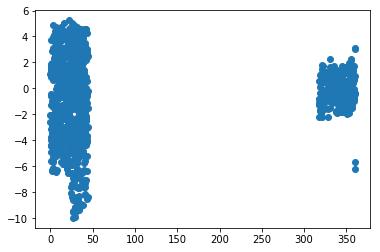

In [81]:
import numpy as np
ind = np.random.randint(0,len(ra_shape_eboss),1000)
import matplotlib.pyplot as plt
plt.scatter((np.array(ra_shape_eboss))[ind],(np.array(dec_shape_eboss))[ind])

In [40]:
from astropy.table import Table
# folder = "/global/cscratch1/sd/giannini/clusteringz/wz/data/"
path = folder + 'data/shape_Y3data_eboss.fits'
fits_f = Table()
fits_f['ra'] = ra_shape_eboss 
fits_f['dec'] = dec_shape_eboss
fits_f['e1'] = e1_shape_eboss 
fits_f['e2'] = e2_shape_eboss 
fits_f['tomo_bin'] = tomo_bin_shape_eboss 
fits_f['id_obj'] = id_obj_shape_eboss
fits_f['flux_i'] = flux_i_shape_eboss
fits_f.write(path)

In [9]:
miao = pf.open(folder + 'data/shape_Y3data_eboss.fits')

In [13]:
ra_sh = miao[1].data['ra']
dec_sh = miao[1].data['dec']
e1_sh = miao[1].data['e1']
e2_sh = miao[1].data['e2']
tomo_bin_sh = miao[1].data['tomo_bin']
id_obj_sh = miao[1].data['id_obj']
flux_i_sh = miao[1].data['flux_i']

In [16]:
from astropy.table import Table
# folder = "/global/cscratch1/sd/giannini/clusteringz/wz/data/"
tbins = 4
for t in range(tbins):
    mask_tbin = tomo_bin_sh == t
    path = folder + 'data/shape_Y3data_eboss_tbin{0}.fits'.format(t)
    fits_f = Table()
    fits_f['ra'] = ra_sh[mask_tbin]
    fits_f['dec'] = dec_sh[mask_tbin]
    fits_f['e1'] = e1_sh[mask_tbin]
    fits_f['e2'] = e2_sh[mask_tbin]
    fits_f['tomo_bin'] = tomo_bin_sh[mask_tbin]
    fits_f['id_obj'] = id_obj_sh[mask_tbin]
    fits_f['flux_i'] = flux_i_sh[mask_tbin]
    fits_f.write(path)

In [4]:
1

1

In [10]:
test = pf.open(folder + 'data/shape_Y3data_eboss.fits')

In [12]:
tomo_bin = (test[1].data['tomo_bin'])

In [ ]:
if 

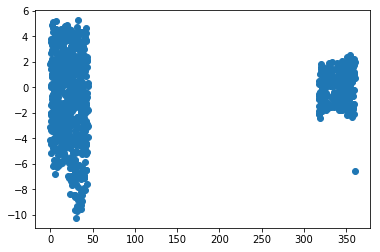

In [14]:
import numpy as np
ind = np.random.randint(0,len(test[1].data['ra'][tomo_bin==0]),1000)
import matplotlib.pyplot as plt
plt.scatter((np.array(test[1].data['ra'][tomo_bin==0]))[ind],(np.array(test[1].data['dec'][tomo_bin==0]))[ind])

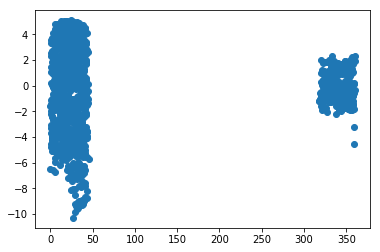

In [15]:
import numpy as np
ind = np.random.randint(0,len(test[1].data['ra'][tomo_bin==1]),1000)
import matplotlib.pyplot as plt
plt.scatter((np.array(test[1].data['ra'][tomo_bin==1]))[ind],(np.array(test[1].data['dec'][tomo_bin==1]))[ind])

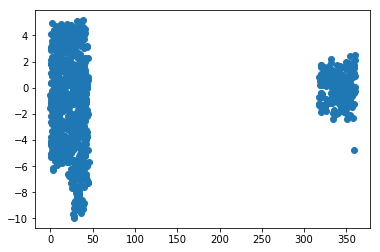

In [16]:
import numpy as np
ind = np.random.randint(0,len(test[1].data['ra'][tomo_bin==2]),1000)
import matplotlib.pyplot as plt
plt.scatter((np.array(test[1].data['ra'][tomo_bin==2]))[ind],(np.array(test[1].data['dec'][tomo_bin==2]))[ind])

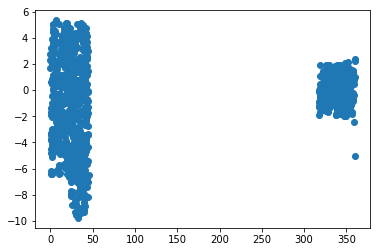

In [17]:
import numpy as np
ind = np.random.randint(0,len(test[1].data['ra'][tomo_bin==3]),1000)
import matplotlib.pyplot as plt
plt.scatter((np.array(test[1].data['ra'][tomo_bin==3]))[ind],(np.array(test[1].data['dec'][tomo_bin==3]))[ind])